In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats


In [3]:
data = pd.read_csv("국내산업정보.csv",encoding = "CP949")
data

,산업명,2016년,2017년,2018년,2019년,2020년,비중,전년대비 증감률,연평균 증감률
0,출판,25452,25829,24995,25220,25244,25.40%,0.10%,△0.2%
1,만화,7726,7172,6628,6607,6144,6.20%,△7.0%,△5.6%
2,음악,37501,36066,35670,34145,33138,33.30%,△2.9%,△3.0%
3,게임,1398,1409,1369,1223,916,0.90%,△25.1%,△10.0%
4,영화,12363,12937,13357,13387,11541,11.60%,△13.8%,△1.7%
5,애니메이션,447,492,509,480,490,0.50%,2.10%,2.30%
6,방송,957,1054,1148,1062,1070,1.10%,0.80%,2.80%
7,광고,7231,7234,7256,7323,6337,6.40%,△13.53%,△3.2%
8,캐릭터,2213,2261,2534,2754,2700,2.70%,△2.0%,5.10%
9,지식정보,8719,9149,9724,9859,9949,10.00%,0.90%,3.40%


In [6]:
dm=data.mean()
dm

/var/folders/d8/5n_g97tn3c17t6q48k70zvp40000gn/T/ipykernel_25553/4274056700.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dm=data.mean()


2016년    9618.636364
2017년    9588.636364
2018년    9573.636364
2019년    9466.909091
2020년    9050.090909
dtype: float64

In [31]:
year_df=data.transpose()
year_df

,0,1,2,3,4,5,6,7,8,9,10
산업명,출판,만화,음악,게임,영화,애니메이션,방송,광고,캐릭터,지식정보,콘텐츠솔루션
2016년,25452,7726,37501,1398,12363,447,957,7231,2213,8719,1798
2017년,25829,7172,36066,1409,12937,492,1054,7234,2261,9149,1872
2018년,24995,6628,35670,1369,13357,509,1148,7256,2534,9724,2120
2019년,25220,6607,34145,1223,13387,480,1062,7323,2754,9859,2076
2020년,25244,6144,33138,916,11541,490,1070,6337,2700,9949,2022
비중,25.40%,6.20%,33.30%,0.90%,11.60%,0.50%,1.10%,6.40%,2.70%,10.00%,2.00%
전년대비 증감률,0.10%,△7.0%,△2.9%,△25.1%,△13.8%,2.10%,0.80%,△13.53%,△2.0%,0.90%,△2.6%
연평균 증감률,△0.2%,△5.6%,△3.0%,△10.0%,△1.7%,2.30%,2.80%,△3.2%,5.10%,3.40%,3.00%


In [32]:
year_df.rename(columns=year_df.iloc[0],inplace=True)
year_df=year_df.drop(year_df.index[0])
year_df

,출판,만화,음악,게임,영화,애니메이션,방송,광고,캐릭터,지식정보,콘텐츠솔루션
2016년,25452,7726,37501,1398,12363,447,957,7231,2213,8719,1798
2017년,25829,7172,36066,1409,12937,492,1054,7234,2261,9149,1872
2018년,24995,6628,35670,1369,13357,509,1148,7256,2534,9724,2120
2019년,25220,6607,34145,1223,13387,480,1062,7323,2754,9859,2076
2020년,25244,6144,33138,916,11541,490,1070,6337,2700,9949,2022
비중,25.40%,6.20%,33.30%,0.90%,11.60%,0.50%,1.10%,6.40%,2.70%,10.00%,2.00%
전년대비 증감률,0.10%,△7.0%,△2.9%,△25.1%,△13.8%,2.10%,0.80%,△13.53%,△2.0%,0.90%,△2.6%
연평균 증감률,△0.2%,△5.6%,△3.0%,△10.0%,△1.7%,2.30%,2.80%,△3.2%,5.10%,3.40%,3.00%


In [33]:
year_df=year_df.loc[['2016년','2017년','2018년','2019년','2020년']]
year_df

,출판,만화,음악,게임,영화,애니메이션,방송,광고,캐릭터,지식정보,콘텐츠솔루션
2016년,25452,7726,37501,1398,12363,447,957,7231,2213,8719,1798
2017년,25829,7172,36066,1409,12937,492,1054,7234,2261,9149,1872
2018년,24995,6628,35670,1369,13357,509,1148,7256,2534,9724,2120
2019년,25220,6607,34145,1223,13387,480,1062,7323,2754,9859,2076
2020년,25244,6144,33138,916,11541,490,1070,6337,2700,9949,2022


Text(0, 0.5, '산업명')

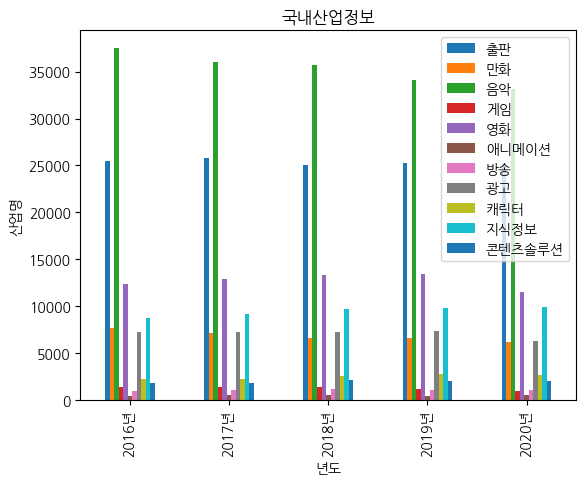

In [35]:
#년도별 국내 산업 증가 추세
mpl.rcParams['font.family'] = 'NanumGothic'
ax=year_df.plot(kind='bar', title='국내산업정보')
ax.set_xlabel("년도")
ax.set_ylabel("산업명")
